# "Building a basic Neural Network from scratch - Kudzu"

- badges: true
- author: Anshuman Gupta

#### In this project, the idea is to write a classifier to differentiate between handwritten digits 3 and 8, from the MNIST database.

#### I will using a custom built neural network library called Kudzu.This has been developed as a part of KTF/Foundations course of Univ.ai (www.univ.ai). The source code for Kudzu Library and and this notebook can be found on my git-hub profile : www.https://github.com/anshuman6 under the folder project-solution. Any feedback and comments are welcome. Please feel free to email me at: anshuman6@gmail.com

#### 1. I will be using the MNIST database. 

#### 2. I will be comparing the results of the 4 layer NN to a standard logistic regression

##### Importing all the necessary libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##### The following command helps us download MNIST from notebook itself. You can skip this if you already have MNIST. You can also download it via your terminal.

In [3]:
!pip install mnist # Please note, it is commented out for now, you can remove comment if you want to install it

You should consider upgrading via the '/opt/hostedtoolcache/Python/3.6.11/x64/bin/python -m pip install --upgrade pip' command.


#### Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


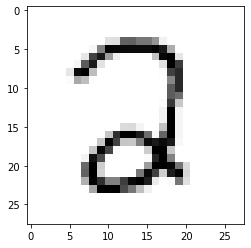

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

##### We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

##### We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

##### Importing Kudzu library and its functionality

In [15]:
from kudzu.data import Data, Dataloader, Sampler
from kudzu.callbacks import AccCallback
from kudzu.loss import MSE
from kudzu.layer import Affine, Sigmoid
from kudzu.model import Model
from kudzu.optim import GD
from kudzu.train import Learner
from kudzu.callbacks import ClfCallback
from kudzu.layer import Sigmoid
from kudzu.layer import Relu

##### We are creating a class, just so that we can use it to store our parameters for us

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

##### Initializing Data

In [17]:
data = Data(X_train, y_train.reshape(-1,1))
loss = MSE()
opt = GD(config.lr)
sampler = Sampler(data, config.bs, shuffle=True)
dl = Dataloader(data, sampler)

##### Constructing 2 different layers, one for NN and one only for logistic regression.

##### Creating containers for data to be passed, to calculate accuracies

In [18]:
training_xdata = X_train
testing_xdata = X_test
training_ydata = y_train.reshape(-1,1)
testing_ydata = y_test.reshape(-1,1)

##### Initializing models and Running training loop: 

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("final", 2, 1), Sigmoid("final")]

model_neural = Model(layers)
model_logistic = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

In [20]:
learner1 = Learner(loss, model_neural, opt, config.num_epochs)
acc1 = ClfCallback(learner1, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner1.set_callbacks([acc1])

In [21]:
learner1.train_loop(dl)

Epoch 0 Loss 0.24432593192570384
train accuracy is: 0.5919712902687364, test accuracy is 0.5801411290322581


Epoch 10 Loss 0.0958394645094234
train accuracy is: 0.9115339676180938, test accuracy is 0.9203629032258065


Epoch 20 Loss 0.05894409268973469
train accuracy is: 0.9369053580370555, test accuracy is 0.9435483870967742


Epoch 30 Loss 0.04615983176006063
train accuracy is: 0.9475880487397763, test accuracy is 0.9556451612903226


Epoch 40 Loss 0.03967433735321773
train accuracy is: 0.9545151059923218, test accuracy is 0.9632056451612904


Epoch 50 Loss 0.03566510580885028
train accuracy is: 0.9593557002169921, test accuracy is 0.9667338709677419


Epoch 60 Loss 0.03288796709676237
train accuracy is: 0.9623602069771323, test accuracy is 0.9692540322580645


Epoch 70 Loss 0.030763705405789786
train accuracy is: 0.9647805040894676, test accuracy is 0.9692540322580645


Epoch 80 Loss 0.029073257511220564
train accuracy is: 0.9669504256384577, test accuracy is 0.9707661290322581


Epoch 90 Loss 0.027678606999544657
train accuracy is: 0.9683692204974128, test accuracy is 0.9717741935483871


Epoch 100 Loss 0.02649826890328021
train accuracy is: 0.9694541812719079, test accuracy is 0.9727822580645161


Epoch 110 Loss 0.025468617576794313
train accuracy is: 0.9704556835252879, test accuracy is 0.9727822580645161


Epoch 120 Loss 0.02454317725291046
train accuracy is: 0.9726256050742781, test accuracy is 0.9727822580645161


Epoch 130 Loss 0.02371280854951954
train accuracy is: 0.9736271073276581, test accuracy is 0.9722782258064516


Epoch 140 Loss 0.022976460951383566
train accuracy is: 0.9744616925388082, test accuracy is 0.9732862903225806


Epoch 150 Loss 0.022307067904455694
train accuracy is: 0.9757970288766483, test accuracy is 0.9727822580645161


Epoch 160 Loss 0.021689332597708288
train accuracy is: 0.9765481555666834, test accuracy is 0.9732862903225806


Epoch 170 Loss 0.021124804061728
train accuracy is: 0.9767985311300283, test accuracy is 0.9732862903225806


Epoch 180 Loss 0.020599315637904
train accuracy is: 0.9773827407778334, test accuracy is 0.9747983870967742


Epoch 190 Loss 0.020105160744945623
train accuracy is: 0.9777165748622935, test accuracy is 0.9747983870967742


Epoch 200 Loss 0.019636557889542886
train accuracy is: 0.9783842430312135, test accuracy is 0.9747983870967742


Epoch 210 Loss 0.019190633907668415
train accuracy is: 0.9786346185945585, test accuracy is 0.9742943548387096


Epoch 220 Loss 0.01877389625190338
train accuracy is: 0.9789684526790186, test accuracy is 0.9742943548387096


Epoch 230 Loss 0.018374312496824426
train accuracy is: 0.9798864964112836, test accuracy is 0.9747983870967742


Epoch 240 Loss 0.017985613698228348
train accuracy is: 0.9803037890168587, test accuracy is 0.9753024193548387


0.0021931710996729425

##### Now running only the logistic regression based classification to compare results with NN

In [22]:
learner2 = Learner(loss, model_logistic, opt, config.num_epochs)
acc2 = ClfCallback(learner2, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner2.set_callbacks([acc2])

In [23]:
learner2.train_loop(dl)

Epoch 0 Loss 0.2636860029313961
train accuracy is: 0.5763645468202303, test accuracy is 0.6164314516129032


Epoch 10 Loss 0.10692408860024807
train accuracy is: 0.9055249540978134, test accuracy is 0.9243951612903226


Epoch 20 Loss 0.08111686760640704
train accuracy is: 0.9257219162076448, test accuracy is 0.9415322580645161


Epoch 30 Loss 0.06947900112413365
train accuracy is: 0.9337339342346853, test accuracy is 0.9501008064516129


Epoch 40 Loss 0.06256750046236567
train accuracy is: 0.9390752795860458, test accuracy is 0.954133064516129


Epoch 50 Loss 0.05789473092424519
train accuracy is: 0.942747454515106, test accuracy is 0.9561491935483871


Epoch 60 Loss 0.05448294158276582
train accuracy is: 0.9455850442330161, test accuracy is 0.9596774193548387


Epoch 70 Loss 0.051858194543289944
train accuracy is: 0.9470038390919713, test accuracy is 0.9611895161290323


Epoch 80 Loss 0.0497611223475957
train accuracy is: 0.9493406776831914, test accuracy is 0.9627016129032258


Epoch 90 Loss 0.04803552970098759
train accuracy is: 0.9510933066266066, test accuracy is 0.9632056451612904


Epoch 100 Loss 0.04658459325735457
train accuracy is: 0.9516775162744117, test accuracy is 0.9632056451612904


Epoch 110 Loss 0.045341994900267815
train accuracy is: 0.9529293940911367, test accuracy is 0.9642137096774194


Epoch 120 Loss 0.04426171668474514
train accuracy is: 0.9535970622600568, test accuracy is 0.9642137096774194


Epoch 130 Loss 0.04331195538705341
train accuracy is: 0.9547654815556669, test accuracy is 0.9652217741935484


Epoch 140 Loss 0.04246563210313559
train accuracy is: 0.9555166082457018, test accuracy is 0.9652217741935484


Epoch 150 Loss 0.041708362765762536
train accuracy is: 0.9563511934568519, test accuracy is 0.9657258064516129


Epoch 160 Loss 0.04102259361712371
train accuracy is: 0.956935403104657, test accuracy is 0.9652217741935484


Epoch 170 Loss 0.04039938490344452
train accuracy is: 0.957686529794692, test accuracy is 0.9657258064516129


Epoch 180 Loss 0.03982796909283101
train accuracy is: 0.9581872809213821, test accuracy is 0.9672379032258065


Epoch 190 Loss 0.03930213760018311
train accuracy is: 0.9587714905691871, test accuracy is 0.967741935483871


Epoch 200 Loss 0.0388170533248167
train accuracy is: 0.9587714905691871, test accuracy is 0.967741935483871


Epoch 210 Loss 0.038365865698804714
train accuracy is: 0.9594391587381071, test accuracy is 0.967741935483871


Epoch 220 Loss 0.037945676862464126
train accuracy is: 0.9599399098647972, test accuracy is 0.967741935483871


Epoch 230 Loss 0.03755321241616782
train accuracy is: 0.9601902854281422, test accuracy is 0.9682459677419355


Epoch 240 Loss 0.03718414968184182
train accuracy is: 0.9606075780337172, test accuracy is 0.96875


0.02232983567593593

### Comparing results of NN and LR

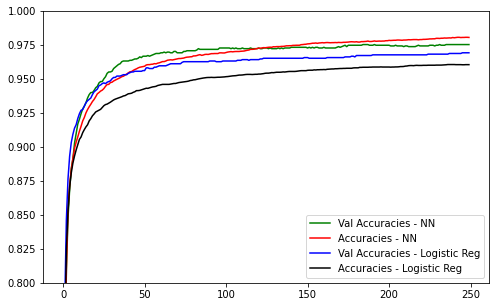

In [24]:
plt.figure(figsize=(8,5))
plt.plot(acc1.val_accuracies, 'g-', label = "Val Accuracies - NN")
plt.plot(acc1.accuracies, 'r-', label = "Accuracies - NN")
plt.plot(acc2.val_accuracies, 'b-', label = "Val Accuracies - Logistic Reg")
plt.plot(acc2.accuracies, 'k-', label = "Accuracies - Logistic Reg")
plt.ylim(0.8,1) ## for a more spread out view
plt.legend()

### Clearly NN has a better accuracy over LR; NN is overfitting - Validation accuracy (green) has dropped below training accuracy (orange), also they are diverging. This problem is not seen in LR

##### Now we will be moving through the network, till the output of the second last affine where we get a 2 dimensional output. We will be plotting this 2d output and probability contours

In [25]:
model_new = Model(layers[:-2])

In [26]:
plot_testing = model_new(testing_xdata)

##### Plotting the scatter plot of points and color coding by class

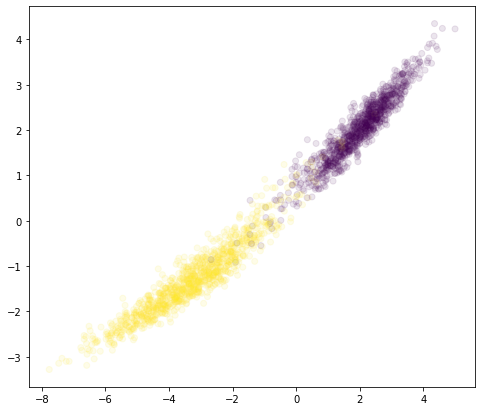

In [27]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel());

##### Plotting probability contours

In [28]:
model_prob = Model(layers[-2:]) ## picking only last two layers to get probability. That is affine followed by sigmoid

In [29]:
xgrid = np.linspace(-4, 1, 100) ## Adjust these values based on above chart, roughly -4 to 1
ygrid = np.linspace(-7.5, 7.5, 100) ## Adjust these values based on above chart, roughly -7.5, 7.5
xg, yg = np.meshgrid(xgrid, ygrid)
# xg and yg are now both 100X100, lets convert them to single arrays 

xg_interim = np.ravel(xg)
yg_interim = np.ravel(yg)

## xg_interim, yg_interim are now arrays of len 10000, now we will stack them and then transpose to get desired shape of n rows, 2 columns

X_interim = np.vstack((xg_interim, yg_interim)) ## Please note vstack takes in a tuple
X = X_interim.T

## We want a shape of n rows and 2 columns to be able to feed this to last affine
## This last affine takes only two columns, hence the above transformation
probability_contour = model_prob(X).reshape(100,100) ## to make it consistent with xg, yg

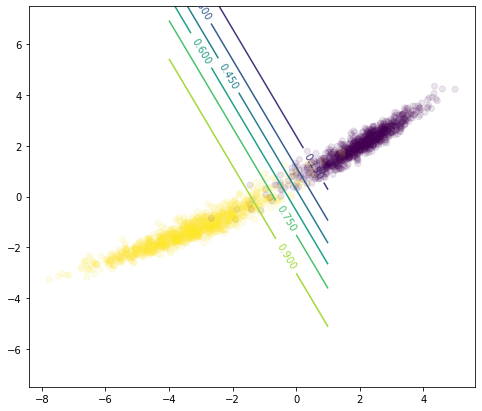

In [30]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(xg,yg,probability_contour)
plt.clabel(contours, inline = True );